## Imports

In [1]:
#imports
import pandas as pd
from datetime import datetime
import functions as fx
import numpy as np

import inspect
from collections import Counter

import matplotlib.pyplot as plt

module://matplotlib_inline.backend_inline


## Loading in the data

In [2]:
sessions = pd.read_csv("export_student_sessions.csv", delimiter=';')
switched = pd.read_csv("export_level_switched_log.csv", delimiter=';')
students = pd.read_csv("export_students.csv", delimiter=';')
users = pd.read_csv("export_users.csv", delimiter=';')
students_filtered = pd.read_csv("students_filtered.csv", delimiter=',')

## Drop Unnecessary Columns
sessions.drop('created_at', axis=1, inplace=True)
sessions.drop('updated_at', axis=1, inplace=True)

switched.drop('created_at', axis=1, inplace=True)
switched.drop('updated_at', axis=1, inplace=True)


In [3]:
def str_to_datetime(string):
    return datetime.strptime(string, '%Y-%m-%d %H:%M:%S')

In [4]:
print(sessions.shape)
sessions.head()


(247480, 8)


,id,interval,stars,score,clippy,block_try_counter,student_id,timestamp
0,49,3.600000,NaN,NaN,1.0,1.0,227b548a-4e80-4333-9fd8-f783c577475e,2021-10-14 10:13:41
1,50,97.666667,NaN,NaN,1.0,1.0,28e3914c-dff4-440e-b169-ddadc8462ea2,2021-09-14 12:57:36
2,51,0.000000,NaN,NaN,1.0,1.0,7976170d-f5bf-4c91-a188-e2db822ac80b,2021-09-15 07:28:18
3,52,0.000000,NaN,NaN,1.0,1.0,64650976-cb58-46b6-87cd-c40685366f11,2021-09-20 07:58:40
4,53,27.000000,NaN,NaN,1.0,1.0,64650976-cb58-46b6-87cd-c40685366f11,2021-09-13 08:06:21


In [5]:
# sessions[(sessions["student_id"]=="cf628452-64b2-4520-b486-cbbb076b52f1")&(sessions['datetime']>cutoff)].groupby('datetime').mean()

# Drop All Sessions from students that did not participate

In [6]:
print(sessions.shape)

(247480, 8)


In [7]:
participating_students = sessions[sessions['student_id'].isin(students_filtered['user_id'])]
participating_students

,id,interval,stars,score,clippy,block_try_counter,student_id,timestamp
0,49,3.600000,NaN,NaN,1.000000,1.000000,227b548a-4e80-4333-9fd8-f783c577475e,2021-10-14 10:13:41
2,51,0.000000,NaN,NaN,1.000000,1.000000,7976170d-f5bf-4c91-a188-e2db822ac80b,2021-09-15 07:28:18
3,52,0.000000,NaN,NaN,1.000000,1.000000,64650976-cb58-46b6-87cd-c40685366f11,2021-09-20 07:58:40
4,53,27.000000,NaN,NaN,1.000000,1.000000,64650976-cb58-46b6-87cd-c40685366f11,2021-09-13 08:06:21
5,54,61.200000,NaN,NaN,1.000000,1.000000,64650976-cb58-46b6-87cd-c40685366f11,2021-09-13 08:06:21
...,...,...,...,...,...,...,...,...
244348,244397,84.545455,NaN,0.611111,0.000000,1.818182,3699cd22-062c-4066-8412-188b22cd243f,2021-11-16 18:58:03
244349,244398,61.000000,NaN,0.711111,0.250000,1.000000,3699cd22-062c-4066-8412-188b22cd243f,2021-11-16 18:58:03
244350,244399,125.090909,NaN,0.608333,0.090909,1.000000,3699cd22-062c-4066-8412-188b22cd243f,2021-11-16 18:58:03
244351,244400,0.000000,NaN,0.666667,0.000000,1.000000,6ad4badc-3dd1-4c4e-b8a2-a601877ce586,2021-11-16 16:58:40


# Some Sessions seem to appear multiple times

after a discussion with CodeSkillz I made the decision to aggregate them (just like the clustering algorithm does)

In [8]:
sessions_2 = pd.DataFrame(columns=['timestamp','id','interval','stars','score','clippy','block_try_counter','student_id','datetime'])

for stu_id in participating_students['student_id'].unique():
    # take mean of all sessions on same date and time
    sessions_student_x = participating_students[participating_students['student_id']==stu_id].groupby('timestamp').mean()
    # .groupby() takes away the student id, get it back. 
    sessions_student_x['student_id'] = stu_id
    #make the index a column in the dataframe
    sessions_student_x.reset_index(level=0, inplace=True)
    #give a datetime variable
    sessions_student_x['datetime'] = sessions_student_x['timestamp'].apply(str_to_datetime)
    
    sessions_2 = pd.merge(sessions_2,
                    sessions_student_x,
                    how='outer')
    





## Make a Cutoff Point (when the experiment started) 
## and drop all sessions before that point in time)

In [9]:
cutoff = str_to_datetime("2021-10-20 13:00:00")
cutoff

datetime.datetime(2021, 10, 20, 13, 0)

In [10]:
# Keep only rows with a datetime after the start of the experiment (2021-10-20 13:00:00)
sessions_to_analyze = sessions_2[sessions_2['datetime']>cutoff]
print(sessions_2.shape, sessions_to_analyze.shape)

# sessions_to_analyze
print(sessions_to_analyze.shape)

sessions_to_analyze.to_csv("sessions_to_analyze.csv", sep=';')

sessions_to_analyze.head()

(671, 9) (325, 9)
(325, 9)


,timestamp,id,interval,stars,score,clippy,block_try_counter,student_id,datetime
1,2021-10-21 10:28:24,35457.738095,41.124648,0.001942,0.611454,0.0,1.162308,227b548a-4e80-4333-9fd8-f783c577475e,2021-10-21 10:28:24
8,2021-10-21 08:17:55,34250.678788,44.721962,3.000000,0.833722,0.0,1.000000,ace9664f-f79c-411d-87d3-4aeaf3962ffb,2021-10-21 08:17:55
9,2021-11-03 18:40:42,131089.000000,103.352941,0.000000,0.750000,0.0,1.000000,ace9664f-f79c-411d-87d3-4aeaf3962ffb,2021-11-03 18:40:42
10,2021-11-04 09:22:00,150719.172619,83.993860,0.000000,0.558061,0.0,1.000000,ace9664f-f79c-411d-87d3-4aeaf3962ffb,2021-11-04 09:22:00
13,2021-11-03 20:50:29,141693.594595,12.076923,2.000000,0.497222,0.0,1.153846,e2179d2e-8989-4f3d-943b-1c7435a6daa6,2021-11-03 20:50:29


In [11]:
interval = sessions_to_analyze['interval']
stars = sessions_to_analyze['stars']
score = sessions_to_analyze['score']
clippy = sessions_to_analyze['clippy']
block_try_counter = sessions_to_analyze['block_try_counter']

print("interval with\n  {}:{}\n  {}:{}\n  {}:{}\n  {}:{}\n".format('stars',interval.corr(stars),
                                         'score',interval.corr(score),
                                         'clippy',interval.corr(clippy),
                                         'block_try_counter',interval.corr(block_try_counter)))

print("stars with\n  {}:{}\n  {}:{}\n  {}:{}\n".format(
                                         'score',stars.corr(score),
                                         'clippy',stars.corr(clippy),
                                         'block_try_counter',stars.corr(block_try_counter)))

print("score with\n  {}:{}\n  {}:{}\n".format(
                                         'clippy',score.corr(clippy),
                                         'block_try_counter',score.corr(block_try_counter)))

print("clippy with\n  {}:{}\n".format(
                                         'block_try_counter',clippy.corr(block_try_counter)))


interval with
  stars:0.11533653600476605
  score:0.16656543476792807
  clippy:-0.02029714043967626
  block_try_counter:-0.14209437762998478

stars with
  score:-0.05815413252336344
  clippy:0.006379308001741827
  block_try_counter:0.09850937976687107

score with
  clippy:-0.24733244854665962
  block_try_counter:-0.04018175349909028

clippy with
  block_try_counter:-0.05226600051907926



# Making the Distinction between the two groups (Control and Experimental)

In [12]:
# Who did switch?

# Drop all the initial switches and keep only switches that happened during the experiment (non-startup phase)
real_switched = switched[switched['from_level'].isin(list(switched['from_level'].value_counts().keys()))]
real_switched


,id,user_id,from_level,to_level
146,147,e5a00790-10d0-4e79-ba66-d9e8836e12ac,VMBO_HAVO,HAVO
147,148,ff0bfe14-f346-4af8-958a-0debdd764cf4,VMBOK,VMBO_HAVO
148,149,c3077517-cd98-4b76-801c-eb63ea574305,VMBOK,VMBO_HAVO
149,150,142f73ec-66b6-461f-83fe-948e4ed37bc7,VMBOK,VMBO_HAVO
150,151,10d31ad6-94e2-4115-92b8-f399cd7497b7,VMBOK,VMBO_HAVO
...,...,...,...,...
449,450,b2d1ce7d-0a75-4cad-ab33-7609c2ed676c,GYMNASIUM,HAVO_VWO
450,451,5aae20ad-9085-46f4-a7be-2307a70eecd3,GYMNASIUM,HAVO_VWO
451,452,2f6e843a-4123-4d6e-8063-318bf0a8c226,GYMNASIUM,HAVO_VWO
452,453,78d8c4e3-6301-4e8d-b583-e5ac08c25aea,GYMNASIUM,HAVO_VWO


In [13]:
['4fe7685f-6e91-4cca-aacc-0908dd55478a',
       '59428e9e-fbc1-4177-81cc-5f0d0a5e3829',
       '2294344e-a6c7-46c1-a627-7cb303ed2a7c'][0] in list(real_switched['user_id'])

len(list(set(real_switched['user_id'].unique())))

97

In [14]:
students_filtered

,user_id,use_adaptive_academic_level
0,d595a165-b21c-4f27-8171-176c6e067c8a,2
1,d5e926d2-270d-4af3-8c6e-0830b686451b,2
2,d5ea68f3-f212-4598-b3f9-161314b6af23,2
3,df335542-f7b1-4375-b327-045d30cb0d24,2
4,e1d07c4e-e1e1-444b-83a2-6ecad488a17e,2
...,...,...
279,f9980421-9a0b-4ab9-909a-fd7ffba7db18,1
280,fa0c8b63-d6c3-4904-b94c-6c347847fd1b,1
281,fc40e830-8c64-4a6a-81d5-bfb392780646,1
282,fefd2af3-362b-44a3-b58e-dfcc7b921d6f,1


In [15]:
# student IDs from the control group (=1):
control_ids = list(students_filtered[students_filtered['use_adaptive_academic_level']==1]['user_id'])
# student IDs from the experimental group (=1):
experimental_ids = list(students_filtered[students_filtered['use_adaptive_academic_level']==2]['user_id'])
# student IDs from the students who switched:
switched_ids = list(real_switched['user_id'].unique())
# student IDs from the students who did not switch:
not_switched_ids = control_ids+(list(set(experimental_ids)-set(switched_ids)))

print("there are {} students in the control group \nthere are {} students in the experimental group (of which {} students that have switched levels at total of {} times)\nThus {} students did not switch".format(len(control_ids),len(experimental_ids),len(switched_ids),sum(switched['from_level'].value_counts()) ,len(not_switched_ids)))
print("{} students were in the experimental group but did not switch".format(len(set(experimental_ids)-set(switched_ids))))

there are 138 students in the control group 
there are 146 students in the experimental group (of which 97 students that have switched levels at total of 308 times)
Thus 187 students did not switch
49 students were in the experimental group but did not switch


In [16]:
#Making different dataframes per group
sessions_to_analyze = pd.read_csv("sessions_to_analyze.csv", sep=';')
sessions_to_analyze.drop('Unnamed: 0', axis=1,inplace=True)

control_df = sessions_to_analyze[sessions_to_analyze['student_id'].isin(control_ids)]
experimental_df = sessions_to_analyze[sessions_to_analyze['student_id'].isin(experimental_ids)]

switched_df = sessions_to_analyze[sessions_to_analyze['student_id'].isin(switched_ids)]
not_switched_df = sessions_to_analyze[sessions_to_analyze['student_id'].isin(not_switched_ids)]



In [17]:
# Get the IDs that have switched during the experiment
switched_ids = list(real_switched['user_id'].unique())
print("{} Students switched during the experiment".format(len(switched_ids)))
# switched_UIDs

97 Students switched during the experiment


In [18]:
control_df.head()

,timestamp,id,interval,stars,score,clippy,block_try_counter,student_id,datetime
1,2021-10-21 08:17:55,34250.678788,44.721962,3.0,0.833722,0.000,1.0,ace9664f-f79c-411d-87d3-4aeaf3962ffb,2021-10-21 08:17:55
2,2021-11-03 18:40:42,131089.000000,103.352941,0.0,0.750000,0.000,1.0,ace9664f-f79c-411d-87d3-4aeaf3962ffb,2021-11-03 18:40:42
3,2021-11-04 09:22:00,150719.172619,83.993860,0.0,0.558061,0.000,1.0,ace9664f-f79c-411d-87d3-4aeaf3962ffb,2021-11-04 09:22:00
5,2021-11-01 09:14:21,71198.500000,0.500000,NaN,0.000000,0.625,1.0,e7ba82df-077c-4ac1-9328-614ada3bd13b,2021-11-01 09:14:21
6,2021-10-21 08:24:36,34310.408537,22.181818,3.0,0.741667,0.000,1.0,ce49b981-8468-4e70-a005-23b6ace3bc72,2021-10-21 08:24:36


In [19]:
experimental_df.head()

,timestamp,id,interval,stars,score,clippy,block_try_counter,student_id,datetime
0,2021-10-21 10:28:24,35457.738095,41.124648,0.001942,0.611454,0.000000,1.162308,227b548a-4e80-4333-9fd8-f783c577475e,2021-10-21 10:28:24
4,2021-11-03 20:50:29,141693.594595,12.076923,2.000000,0.497222,0.000000,1.153846,e2179d2e-8989-4f3d-943b-1c7435a6daa6,2021-11-03 20:50:29
8,2021-11-01 13:09:49,89089.914530,81.000545,NaN,0.399629,0.000000,1.223312,8dc6bc06-26a7-4b34-8960-ec3f64a04612,2021-11-01 13:09:49
9,2021-10-20 13:45:12,18439.487805,87.857143,NaN,0.714286,0.000000,1.000000,4fe7685f-6e91-4cca-aacc-0908dd55478a,2021-10-20 13:45:12
10,2021-10-21 09:06:52,34756.343949,54.000000,NaN,0.555556,0.111111,1.000000,2169f104-8006-46cf-8cd0-8aaf0c14c65c,2021-10-21 09:06:52


In [20]:
switched_df.head()

,timestamp,id,interval,stars,score,clippy,block_try_counter,student_id,datetime
0,2021-10-21 10:28:24,35457.738095,41.124648,0.001942,0.611454,0.000000,1.162308,227b548a-4e80-4333-9fd8-f783c577475e,2021-10-21 10:28:24
4,2021-11-03 20:50:29,141693.594595,12.076923,2.000000,0.497222,0.000000,1.153846,e2179d2e-8989-4f3d-943b-1c7435a6daa6,2021-11-03 20:50:29
8,2021-11-01 13:09:49,89089.914530,81.000545,NaN,0.399629,0.000000,1.223312,8dc6bc06-26a7-4b34-8960-ec3f64a04612,2021-11-01 13:09:49
9,2021-10-20 13:45:12,18439.487805,87.857143,NaN,0.714286,0.000000,1.000000,4fe7685f-6e91-4cca-aacc-0908dd55478a,2021-10-20 13:45:12
10,2021-10-21 09:06:52,34756.343949,54.000000,NaN,0.555556,0.111111,1.000000,2169f104-8006-46cf-8cd0-8aaf0c14c65c,2021-10-21 09:06:52


In [21]:
not_switched_df.head()

,timestamp,id,interval,stars,score,clippy,block_try_counter,student_id,datetime
1,2021-10-21 08:17:55,34250.678788,44.721962,3.0,0.833722,0.000,1.0,ace9664f-f79c-411d-87d3-4aeaf3962ffb,2021-10-21 08:17:55
2,2021-11-03 18:40:42,131089.000000,103.352941,0.0,0.750000,0.000,1.0,ace9664f-f79c-411d-87d3-4aeaf3962ffb,2021-11-03 18:40:42
3,2021-11-04 09:22:00,150719.172619,83.993860,0.0,0.558061,0.000,1.0,ace9664f-f79c-411d-87d3-4aeaf3962ffb,2021-11-04 09:22:00
5,2021-11-01 09:14:21,71198.500000,0.500000,NaN,0.000000,0.625,1.0,e7ba82df-077c-4ac1-9328-614ada3bd13b,2021-11-01 09:14:21
6,2021-10-21 08:24:36,34310.408537,22.181818,3.0,0.741667,0.000,1.0,ce49b981-8468-4e70-a005-23b6ace3bc72,2021-10-21 08:24:36


# How many switches were made up and down?

In [22]:
#how often did users switch? => at most 8 times
real_switched['user_id'].value_counts()

Counter(list(zip(real_switched.from_level, real_switched.to_level)))



Counter({('VMBO_HAVO', 'HAVO'): 74,
         ('VMBOK', 'VMBO_HAVO'): 58,
         ('HAVO', 'HAVO_VWO'): 51,
         ('VMBO_HAVO', 'VMBOK'): 7,
         ('HAVO_VWO', 'GYMNASIUM'): 62,
         ('GYMNASIUM', 'HAVO_VWO'): 44,
         ('HAVO', 'VMBO_HAVO'): 5,
         ('HAVO_VWO', 'HAVO'): 7})

## Making CSVs to import in STATA

In [23]:
#make a csv for control vs experimental
experimental_df['group'] = "experimental"
control_df['group'] = "control"
control_df

control_and_experimental = pd.merge(experimental_df, control_df, how='outer')
control_and_experimental.to_csv("control_vs_experimental.csv", sep=',')

#make a csv for switched vs non-switched
switched_df['group'] = "switched"
not_switched_df['group'] = "not_switched"


switched_vs_not_switched = pd.merge(switched_df, not_switched_df, how='outer')
switched_vs_not_switched.to_csv("switched_vs_not_switched.csv", sep=',')

C:\Users\s155633\AppData\Local\Temp/ipykernel_7632/2839007218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experimental_df['group'] = "experimental"
C:\Users\s155633\AppData\Local\Temp/ipykernel_7632/2839007218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_df['group'] = "control"
C:\Users\s155633\AppData\Local\Temp/ipykernel_7632/2839007218.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [24]:
switched_vs_not_switched

,timestamp,id,interval,stars,score,clippy,block_try_counter,student_id,datetime,group
0,2021-10-21 10:28:24,35457.738095,41.124648,0.001942,0.611454,0.000000,1.162308,227b548a-4e80-4333-9fd8-f783c577475e,2021-10-21 10:28:24,switched
1,2021-11-03 20:50:29,141693.594595,12.076923,2.000000,0.497222,0.000000,1.153846,e2179d2e-8989-4f3d-943b-1c7435a6daa6,2021-11-03 20:50:29,switched
2,2021-11-01 13:09:49,89089.914530,81.000545,NaN,0.399629,0.000000,1.223312,8dc6bc06-26a7-4b34-8960-ec3f64a04612,2021-11-01 13:09:49,switched
3,2021-10-20 13:45:12,18439.487805,87.857143,NaN,0.714286,0.000000,1.000000,4fe7685f-6e91-4cca-aacc-0908dd55478a,2021-10-20 13:45:12,switched
4,2021-10-21 09:06:52,34756.343949,54.000000,NaN,0.555556,0.111111,1.000000,2169f104-8006-46cf-8cd0-8aaf0c14c65c,2021-10-21 09:06:52,switched
...,...,...,...,...,...,...,...,...,...,...
320,2021-11-16 16:58:40,241148.954545,5.471591,0.000000,0.680303,0.000000,1.000000,6ad4badc-3dd1-4c4e-b8a2-a601877ce586,2021-11-16 16:58:40,not_switched
321,2021-11-10 14:06:44,190317.903720,25.195967,2.000000,0.409494,0.000000,1.035636,593ae9d4-e9ab-41e8-8d56-e152bebdef6d,2021-11-10 14:06:44,not_switched
322,2021-11-12 13:14:13,203826.500000,77.342857,1.000000,0.542604,0.000000,1.171429,838c4e69-f68b-47d3-aa07-48e2f4b3f721,2021-11-12 13:14:13,not_switched
323,2021-11-12 13:35:38,206948.575480,54.757823,0.500000,0.677629,0.000000,1.059957,838c4e69-f68b-47d3-aa07-48e2f4b3f721,2021-11-12 13:35:38,not_switched


## Means , Medians and More

In [25]:
switched_vs_not_switched.groupby('group').mean()

,id,interval,stars,score,clippy,block_try_counter
group,,,,,,
not_switched,125637.801694,53.040013,0.911510,0.571178,0.023621,1.190178
switched,118705.849897,53.747608,1.006825,0.536027,0.034264,1.289963


In [26]:
switched_vs_not_switched.groupby('group').std()

,id,interval,stars,score,clippy,block_try_counter
group,,,,,,
not_switched,73852.221342,32.458292,1.040890,0.210585,0.086896,0.833089
switched,69456.558189,30.855250,0.982687,0.186941,0.102263,0.846425


In [27]:
switched_vs_not_switched.groupby('group').median()

,id,interval,stars,score,clippy,block_try_counter
group,,,,,,
not_switched,138658.333333,54.714286,0.500000,0.574434,0.0,1.015120
switched,129294.115870,49.385095,0.874133,0.514286,0.0,1.058538


In [28]:
control_and_experimental.groupby('group').mean()

,id,interval,stars,score,clippy,block_try_counter
group,,,,,,
control,123552.123397,54.733221,0.951519,0.572872,0.026475,1.154220
experimental,121180.515797,52.241786,0.960646,0.538200,0.030760,1.310199


In [29]:
control_and_experimental.groupby('group').std()

,id,interval,stars,score,clippy,block_try_counter
group,,,,,,
control,74537.121110,31.608264,1.048717,0.204810,0.091614,0.548874
experimental,69446.057385,31.716120,0.983780,0.194881,0.097419,1.019661


In [30]:
control_and_experimental.groupby('group').median()

,id,interval,stars,score,clippy,block_try_counter
group,,,,,,
control,131089.000000,55.000,0.835888,0.574434,0.0,1.02374
experimental,131085.923302,48.725,0.707045,0.524746,0.0,1.05000


### How often did students switch up and down?

In [31]:
example = real_switched[real_switched['user_id']==switched_ids[5]]

def lev_to_nu(lev):
    return {"VMBOK":2,
              "VMBO_HAVO":3,
              "HAVO":4,
              "HAVO_VWO":5,
              "GYMNASIUM":6}[lev]

def up_or_down(s):
    if (s['from_lev_nu'] < s['to_lev_nu']):
        return "UP"
    else:
        return "DOWN"


real_switched['from_lev_nu'] = real_switched['from_level'].apply(lev_to_nu);
real_switched['to_lev_nu'] = real_switched['to_level'].apply(lev_to_nu);

real_switched['up_down'] = real_switched.apply(up_or_down, axis=1)


C:\Users\s155633\AppData\Local\Temp/ipykernel_7632/517058745.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_switched['from_lev_nu'] = real_switched['from_level'].apply(lev_to_nu);
C:\Users\s155633\AppData\Local\Temp/ipykernel_7632/517058745.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_switched['to_lev_nu'] = real_switched['to_level'].apply(lev_to_nu);
C:\Users\s155633\AppData\Local\Temp/ipykernel_7632/517058745.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [32]:
# for sid in switched_ids:
#     print(real_switched[real_switched['user_id']==sid].shape)

real_switched[real_switched['user_id']==switched_ids[5]]

,id,user_id,from_level,to_level,from_lev_nu,to_lev_nu,up_down
151,152,ca757ff7-3596-4b88-b096-7b9f56d1b75a,VMBO_HAVO,HAVO,3,4,UP
162,163,ca757ff7-3596-4b88-b096-7b9f56d1b75a,HAVO,HAVO_VWO,4,5,UP
338,339,ca757ff7-3596-4b88-b096-7b9f56d1b75a,HAVO_VWO,GYMNASIUM,5,6,UP
360,361,ca757ff7-3596-4b88-b096-7b9f56d1b75a,GYMNASIUM,HAVO_VWO,6,5,DOWN
361,362,ca757ff7-3596-4b88-b096-7b9f56d1b75a,HAVO_VWO,HAVO,5,4,DOWN
362,363,ca757ff7-3596-4b88-b096-7b9f56d1b75a,HAVO,HAVO_VWO,4,5,UP
363,364,ca757ff7-3596-4b88-b096-7b9f56d1b75a,HAVO_VWO,GYMNASIUM,5,6,UP
371,372,ca757ff7-3596-4b88-b096-7b9f56d1b75a,GYMNASIUM,HAVO_VWO,6,5,DOWN
383,384,ca757ff7-3596-4b88-b096-7b9f56d1b75a,HAVO_VWO,GYMNASIUM,5,6,UP
393,394,ca757ff7-3596-4b88-b096-7b9f56d1b75a,GYMNASIUM,HAVO_VWO,6,5,DOWN


2    68
3    38
6    24
5    15
4     1
Name: start_level, dtype: int64


C:\Users\s155633\AppData\Local\Temp/ipykernel_7632/2707799556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial['start_level'] = initial['to_level'].apply(lev_to_nu);


Text(0.5, 1.0, 'Initial levels of students')

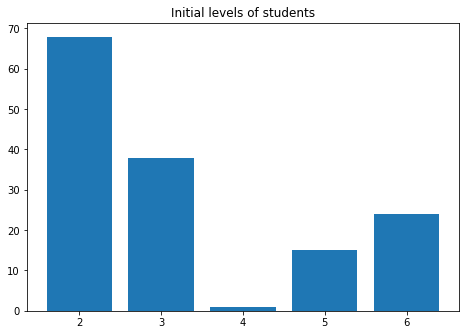

In [33]:
# start_levels
initial = switched.head(146)

initial['start_level'] = initial['to_level'].apply(lev_to_nu);

print(initial['start_level'].value_counts())

fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([2,3,4,5,6], [68,38,1,15,24])
plt.title('Initial levels of students')

### Making the CSV's for the regression

In [34]:
start = switched_vs_not_switched.groupby('student_id').mean()
start['Nup'] = 0
start['Ndown'] = 0

# adding n_up
# start.index[0]

def up_down(sid):
    try:
        no_down = real_switched[real_switched['user_id']==sid]['up_down'].value_counts().DOWN
    except:
        no_down = 0

    try:
        no_up = real_switched[real_switched['user_id']==sid]['up_down'].value_counts().UP
    except:
        no_up = 0
        
    return no_up, no_down



up_down("ca757ff7-3596-4b88-b096-7b9f56d1b75a")

start["Nup"] = [up_down(sid)[0] for sid in start.index]
start["Ndown"] = [up_down(sid)[1] for sid in start.index]
start['cond'] = [switched_vs_not_switched[switched_vs_not_switched['student_id']==sid]['group'].iloc[0] for sid in start.index]


start.to_csv("regres_sns.csv", sep=';')
start.drop('cond', axis=1, inplace = True)

start['cond'] = [control_and_experimental[control_and_experimental['student_id']==sid]['group'].iloc[0] for sid in start.index]
start.to_csv("regres_CE.csv", sep=';')

### How often did the students switch that did switch

In [35]:
start.Nup.loc[lambda x : x>0].value_counts(), start.Ndown.loc[lambda x : x>0].value_counts()




(1    31
 4    22
 3    15
 2    12
 5     5
 6     3
 Name: Nup, dtype: int64,
 1    28
 3     6
 2     6
 4     1
 Name: Ndown, dtype: int64)

In [36]:
sum([37,14,16,22,5,3])

97

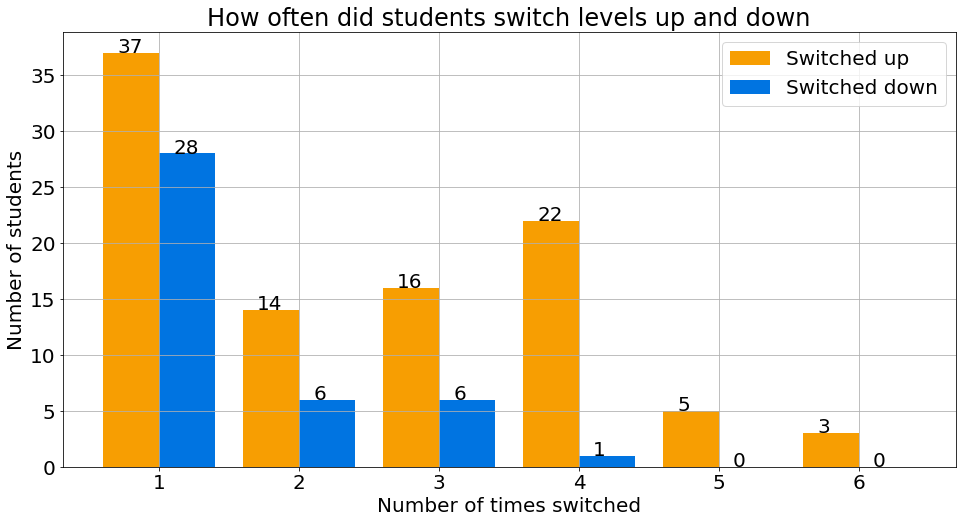

In [71]:
color1 = '#F79E02'
color2 = '#0074E1'

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.bar([0.8,1.8,2.8,3.8,4.8,5.8],
        [37,14,16,22,5,3], 
        width=0.4,
        color = color1,
       label="Switched up")
plt.bar([1.2,2.2,3.2,4.2,5.2,6.2],
        [28,6,6,1,0,0],
        width=0.4, 
        color = color2,
        label="Switched down")
plt.grid();
plt.xticks(fontsize=20);
plt.xlabel("Number of times switched", fontsize=20);

plt.yticks(fontsize=20);
plt.ylabel("Number of students", fontsize=20);

for i in range(6):
    ax.text(i+0.7,
            [37,14,16,22,5,3][i], 
            str([37,14,16,22,5,3][i]), 
            fontsize=20)
    
for i in range(6):
    ax.text(i+1.1,
            [28,6,6,1,0,0][i],
            str([28,6,6,1,0,0][i]), 
            fontsize=20)
    
plt.legend(fontsize=20)
plt.title("How often did students switch levels up and down", fontsize=24);

# real_switched['user_id'].unique()
plt.savefig("How_often_did_students_switch_levels_up_and_down.png")

In [38]:
start.Ndown.loc[lambda x : x>0].value_counts(), start.Ndown.value_counts()

(1    28
 3     6
 2     6
 4     1
 Name: Ndown, dtype: int64,
 0    147
 1     28
 3      6
 2      6
 4      1
 Name: Ndown, dtype: int64)

## TESTTEST (kladblok joost)

In [39]:
# DF to get user-IDs from userable IDs
student_users = users[users['userable_type']=='student']
student_users.head()

,id,entree_uid,first_name,last_name,email,email_verified_at,password,userable_id,userable_type,remember_token,kennisnet_info,created_at,updated_at
2,00823529-459a-49e3-89dd-0fd3bab69d1d,xxx,xxx,xxx,xxx,xxx,$2y$10$x/vXNUNVTOhZJY/2RB2nD.vM1Z20Ze9DWaZWyuX...,1621,student,NaN,xxx,2021-03-19 09:56:03,2021-03-19 09:56:03
3,0089f530-a8d3-4b95-be12-f28fc9387774,xxx,xxx,xxx,xxx,xxx,$2y$10$2d3NwCTaKyvkiCyF61IYYu5Kse1aE0igW2DKIwZ...,1167,student,NaN,xxx,2020-10-12 07:39:33,2020-10-12 07:39:33
4,00955978-dd74-4903-87b9-19d5c78f9f63,xxx,xxx,xxx,xxx,xxx,$2y$10$st/c6x.Kq0h95GPt2va4FOs1dp9t9yiWGzklUnb...,779,student,NaN,xxx,2020-09-11 08:20:47,2020-09-11 08:20:47
6,00cdcdce-737d-4511-b48b-69c0102b7b37,xxx,xxx,xxx,xxx,xxx,$2y$10$vMcfp7JuxYtGCbEgrZqVKeANETaJJZ8o/sFfDbO...,2143,student,NaN,xxx,2021-09-23 09:28:10,2021-09-23 09:28:10
7,00d92221-d50a-4ae4-ae23-87b22b4ec3d7,xxx,xxx,xxx,xxx,xxx,$2y$10$DntQaHO/Z5vEloeg1.dTh.c5NR7ekQ6EJjUa/q4...,2214,student,NaN,xxx,2021-09-24 12:29:14,2021-09-24 12:29:14


In [40]:
# Get the sessions from all students that have switched levels during the experiment
sessions_switched_students = sessions_to_analyze[sessions_to_analyze['student_id'].isin(switched_ids)]
sessions_switched_students.head()

,timestamp,id,interval,stars,score,clippy,block_try_counter,student_id,datetime
0,2021-10-21 10:28:24,35457.738095,41.124648,0.001942,0.611454,0.000000,1.162308,227b548a-4e80-4333-9fd8-f783c577475e,2021-10-21 10:28:24
4,2021-11-03 20:50:29,141693.594595,12.076923,2.000000,0.497222,0.000000,1.153846,e2179d2e-8989-4f3d-943b-1c7435a6daa6,2021-11-03 20:50:29
8,2021-11-01 13:09:49,89089.914530,81.000545,NaN,0.399629,0.000000,1.223312,8dc6bc06-26a7-4b34-8960-ec3f64a04612,2021-11-01 13:09:49
9,2021-10-20 13:45:12,18439.487805,87.857143,NaN,0.714286,0.000000,1.000000,4fe7685f-6e91-4cca-aacc-0908dd55478a,2021-10-20 13:45:12
10,2021-10-21 09:06:52,34756.343949,54.000000,NaN,0.555556,0.111111,1.000000,2169f104-8006-46cf-8cd0-8aaf0c14c65c,2021-10-21 09:06:52


In [41]:
# Get the sessions from all students that have switched levels during the experiment
sessions_control = sessions_to_analyze[sessions_to_analyze['student_id'].isin(control_group_ids)]
sessions_control.head()

NameError: name 'control_group_ids' is not defined

In [ ]:
# Get the sessions from all students that have switched levels during the experiment
sessions_experimental = sessions_to_analyze[sessions_to_analyze['student_id'].isin(experimental_group_IDs)]
sessions_experimental.head()

In [ ]:
print("there are {} sessions from students in the control group \nthere are {} sessions from students in the experimental group \nthere are {} sessions from students that have switched levels".format(len(sessions_control),len(sessions_experimental),len(sessions_switched_students)))

In [ ]:
sessions_switched_students[sessions_switched_students['student_id']=="f7d54c77-186e-41f0-ab80-75f3c6420179"]

In [ ]:
sessions_switched_students['student_id'].value_counts()

In [ ]:
sessions_control['student_id'].value_counts()

In [ ]:
sessions_experimental['student_id'].value_counts()

In [ ]:
sessions_switched_students['student_id'].value_counts().plot.line()
sessions_control['student_id'].value_counts().plot.line()
sessions_experimental['student_id'].value_counts().plot.line()


In [ ]:
sessions_experimental['student_id'].value_counts().plot.hist(bins=30, title='switched students')

In [ ]:
frequent_student = sessions_to_analyze[sessions_to_analyze['student_id']=="2f6e843a-4123-4d6e-8063-318bf0a8c226"]

frequent_student

In [ ]:
for column in frequent_student.columns:
    print("\n",column)
    print(frequent_student[column].describe())

In [6]:
from math import sqrt
sqrt(0.004)

0.06324555320336758